# Keras

In [57]:
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers import Dropout

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
train_variant = pd.read_csv("training_variants")
test_variant = pd.read_csv("test_variants")
train_text = pd.read_csv("training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text = pd.read_csv("test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [79]:
train = pd.merge(train_variant, train_text, how='left', on='ID')
train_y = train['Class'].values
train_x = train.drop('Class', axis=1)

In [5]:
test_x = pd.merge(test_variant, test_text, how='left', on='ID')
test_index = test_x['ID'].values

In [6]:
all_data = np.concatenate((train_x, test_x), axis=0)
all_data = pd.DataFrame(all_data)
all_data.columns = ["ID", "Gene", "Variation", "Text"]

In [7]:
all_data.tail()

,ID,Gene,Variation,Text
8984,5663,SLC46A1,R113S,The realization in the late 1970s that RAS har...
8985,5664,FOXC1,L130F,Hemizygous deletions are common molecular abno...
8986,5665,GSS,R267W,All most R267W of has with to SMARTpool invest...
8987,5666,CTSK,G79E,Abstract Blood samples from 125 unrelated fami...
8988,5667,DFNB59,T54I,"Loss of DNA mismatch repair (MMR) in humans, m..."


In [8]:
sentences = all_data['Text']
sentences.head()

0    Cyclin-dependent kinases (CDKs) regulate a var...
1     Abstract Background  Non-small cell lung canc...
2     Abstract Background  Non-small cell lung canc...
3    Recent evidence has demonstrated that acquired...
4    Oncogenic mutations in the monomeric Casitas B...
Name: Text, dtype: object

In [9]:
vect = TfidfVectorizer(stop_words='english')
sentence_vectors = vect.fit_transform(sentences)

In [10]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(200)
sentence_vectors = svd.fit_transform(sentence_vectors)

In [50]:
def baseline_model():
    model = Sequential()
    model.add(Dense(512, input_dim=200, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, init='normal', activation='relu'))
    model.add(Dense(9, init='normal', activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [51]:
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_y = encoder.transform(train_y)

In [52]:
dummy_y = np_utils.to_categorical(encoded_y)
print(dummy_y.shape)

(3321, 9)


In [66]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=64)
history = estimator.fit(sentence_vectors[0:3321], dummy_y, validation_split=0.05)

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", input_dim=200, kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="normal")`
  """
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="normal")`
  import sys
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="normal")`
  if __name__ == '__main__':
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:10

Train on 3154 samples, validate on 167 samples
Epoch 1/20
3154/3154 [==============================] - 4s - loss: 1.5727 - acc: 0.4350 - val_loss: 1.6610 - val_acc: 0.3413
Epoch 2/20
3154/3154 [==============================] - 1s - loss: 1.1209 - acc: 0.5859 - val_loss: 1.4645 - val_acc: 0.5090
Epoch 3/20
3154/3154 [==============================] - 1s - loss: 0.9909 - acc: 0.6268 - val_loss: 1.5138 - val_acc: 0.4731
Epoch 4/20
3154/3154 [==============================] - 1s - loss: 0.9206 - acc: 0.6519 - val_loss: 1.5647 - val_acc: 0.4671
Epoch 5/20
3154/3154 [==============================] - 1s - loss: 0.8512 - acc: 0.6630 - val_loss: 1.6041 - val_acc: 0.4251
Epoch 6/20
3154/3154 [==============================] - 1s - loss: 0.8102 - acc: 0.6779 - val_loss: 1.6259 - val_acc: 0.4431
Epoch 7/20
3154/3154 [==============================] - 1s - loss: 0.7762 - acc: 0.6966 - val_loss: 1.5878 - val_acc: 0.4551
Epoch 8/20
3154/3154 [==============================] - 1s - loss: 0.7285 - ac

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [69]:
print(history.history.keys())

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])


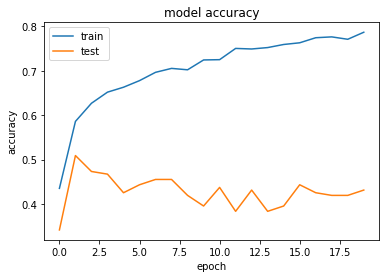

In [70]:
#accuracy of model - 20 epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

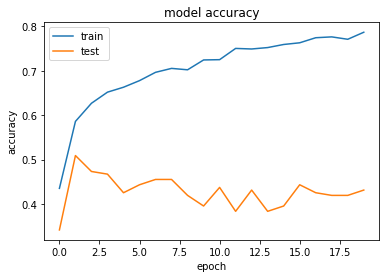

In [71]:
#accuracy of model - 150 epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

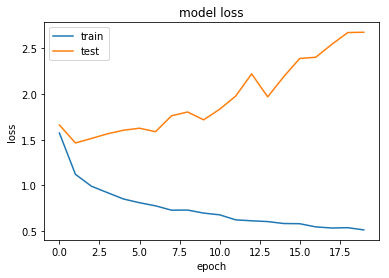

In [72]:
#loss of model - 20 epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

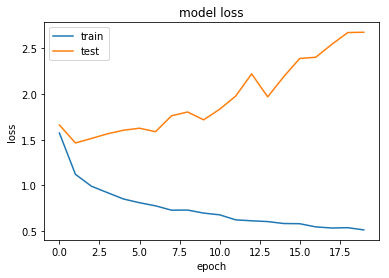

In [73]:
#loss of model - 150 epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [74]:
y_pred = estimator.predict_proba(sentence_vectors[3321:])

5632/5668 [============================>.] - ETA: 0s

In [75]:
sub = pd.DataFrame(y_pred)
sub.head()

,0,1,2,3,4,5,6,7,8
0,0.000005,0.405908,0.000068,0.000025,0.000962,0.000083,0.592938,0.000009,5.466317e-07
1,0.026884,0.001179,0.095435,0.865196,0.001718,0.000743,0.008730,0.000005,1.095243e-04
2,0.034882,0.436250,0.009557,0.070684,0.099531,0.059637,0.273721,0.010297,5.442069e-03
3,0.000001,0.874475,0.000002,0.000002,0.000084,0.000058,0.125370,0.000008,3.203030e-08
4,0.045637,0.659034,0.000763,0.039706,0.009343,0.006214,0.090055,0.142800,6.447601e-03


# Linear SVC

In [50]:
#train.columns
#test_x.columns

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [81]:
train_df, test_df = train_test_split(train, test_size=0.2)
np.random.seed(0)
train_df.head()

,ID,Gene,Variation,Class,Text
2401,2401,NF1,R1276P,4,"RasGAPs supply a catalytic residue, termed th..."
2088,2088,AGO2,Amplification,2,Argonaute (Ago) 2 is the catalytic engine of m...
1686,1686,FLT3,Amplification,7,A considerable number of patients with metasta...
53,53,PTPRT,N510K,1,The receptor protein tyrosine phosphatase T (P...
1283,1283,HRAS,Q61H,2,Background: In numerous biological events the ...


In [82]:
X_train = train_df['Text'].values
X_test = test_df['Text'].values
y_train = train_df['Class'].values
y_test = test_df['Class'].values

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm

In [84]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.LinearSVC())
])
text_clf = text_clf.fit(X_train,y_train)

In [85]:
y_test_predicted = text_clf.predict(X_test)

In [86]:
np.mean(y_test_predicted == y_test)

0.63609022556390982

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_predicted, pos_label=2)
metrics.auc(fpr, tpr)

0.53848926322179236

In [35]:
y_test.shape

(665,)

In [88]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.SVC(kernel='linear',probability=True))
])
text_clf = text_clf.fit(X_train,y_train)

In [89]:
sub = text_clf.predict_proba(X_test)

In [90]:
sub = pd.DataFrame(sub)

In [91]:
sub.head()

,0,1,2,3,4,5,6,7,8
0,0.013146,0.209003,0.017478,0.023479,0.024441,0.011941,0.692020,0.004772,0.003720
1,0.039995,0.005074,0.005856,0.019955,0.125344,0.795391,0.001509,0.003835,0.003041
2,0.382943,0.296436,0.010894,0.081522,0.040569,0.031399,0.145109,0.006162,0.004966
3,0.061469,0.013443,0.240813,0.622235,0.024292,0.019721,0.009463,0.004140,0.004425
4,0.048764,0.004264,0.181892,0.455862,0.257836,0.038329,0.003811,0.004252,0.004990
